# Semantic Segmentation - Practical Example
    Guilherme Milan Santos No. 9012966
    Romeu Bertho Junior    No. 7151905

This notebook is an example of how to load the FCN-Alexnet and a dataset, and how to perform predictions and see the results.
The FCN-Alexnet being shown here has been trained on a fraction of the whole COCO dataset (10,000 out of about 87,000 images).

In [9]:
import main
from coco_dataset import CocoDataset
from pycocotools.coco import COCO
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Loading the dataset

COCO provides an auxiliary API, in which the annotations are provided in an encoded and compressed format. This step loads these annotations as well as one of our trained FCN models, which is copied into the GPU. A PyTorch DataLoader to feed data to the model is also instantiated.

In [10]:
checkpoint = main.load_latest_model()
model = checkpoint['model']
model = model.cuda()
coco_api = COCO("coco\\ground_truth\\instances_train2014.json")
transform = transforms.Compose([transforms.ToTensor()])
dataset = CocoDataset("coco\\images\\", coco_api, transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=False)

latest model customfcn_0_10080.pickle
loading model contained in the file checkpoints\customfcn_0_10080.pickle
loading annotations into memory...
Done (t=35.53s)
creating index...
index created!


# Making predictions
The following code loads a small batch of data through the DataLoader and then proceeds to copy that data into the GPU where the network was stored. The model then performs inference on the data batch.

In [11]:
cuda_predictions = None

for sample, label in data_loader:
    sample = sample.cuda()
    cuda_predictions = model(sample)
    break
cpu_predictions = cuda_predictions.cpu()
predictions = cpu_predictions.detach().numpy()

# Visualizing the results
This section displays an example where the network's predictions are turned into a visible format. The original images and the generated masks are then displayed side by side. 

The first column shows the original image, while the second column contains the raw output from the network. The third column displays the isolated mask, while the last column overlays the mask on the original image.

<Figure size 360x360 with 0 Axes>

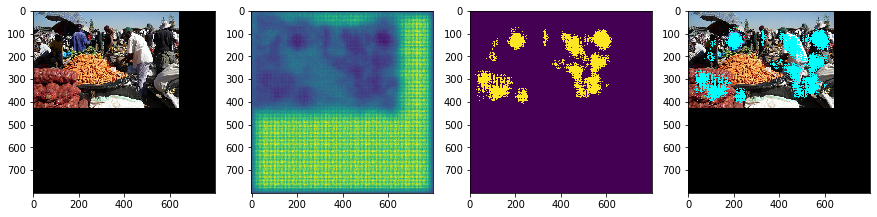

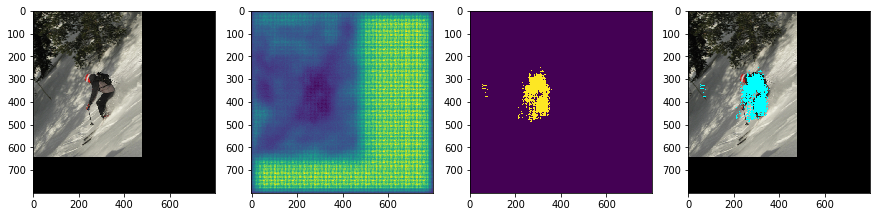

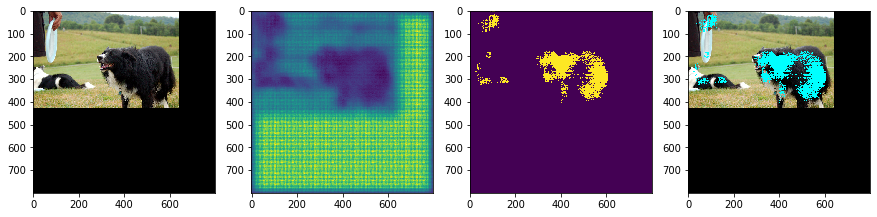

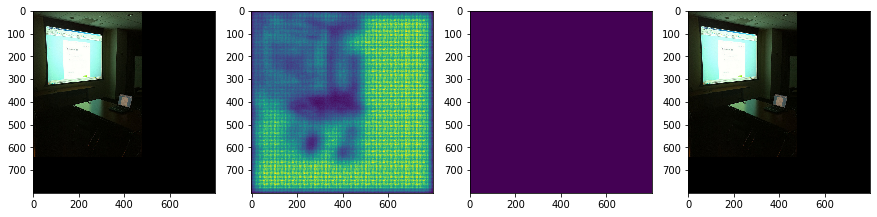

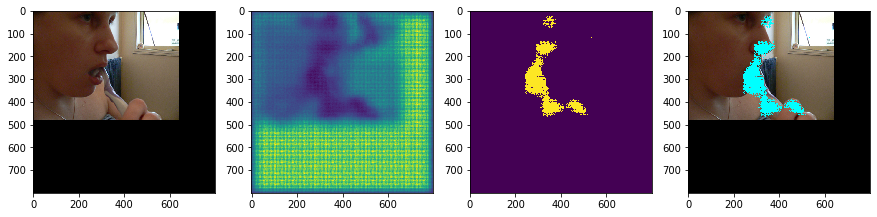

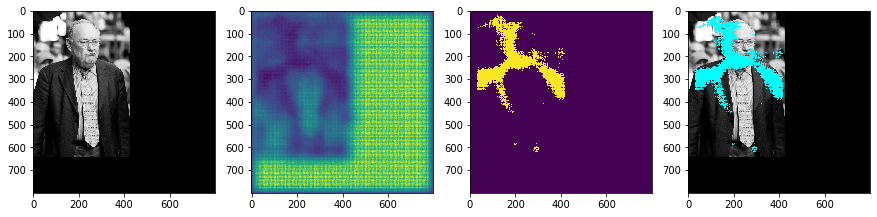

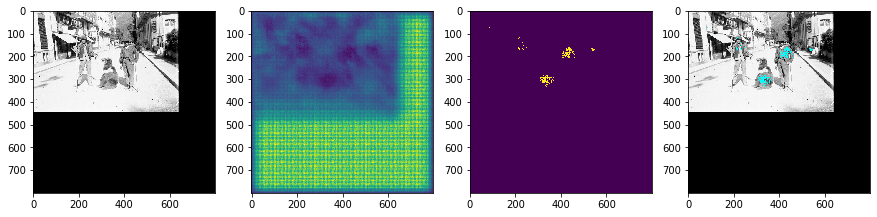

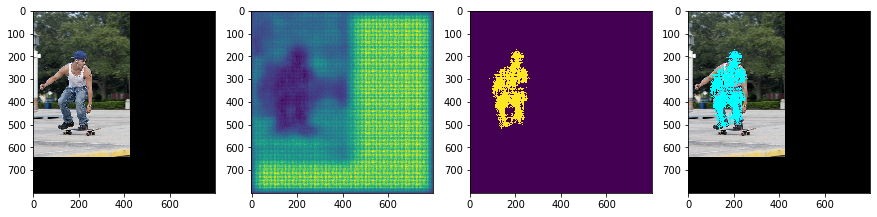

In [12]:
def get_segm_mask(image, prediction, thresh=1.4):
    person_channel = prediction
    thresh = 1.4
    one_indexes = person_channel <= thresh
    zero_indexes = person_channel > thresh
    thresh_channel = person_channel.copy()
    thresh_channel[one_indexes] = 1
    thresh_channel[zero_indexes] = 0
    
    masked_image = image.copy()
    masked_image[one_indexes] = [0,255,255]
    return thresh_channel, masked_image
    

fig = plt.figure(figsize=(5,5))
x = []
y = []
for i in range(0,8):
    x.append([1,2,3])
    y.append([1,2,3])

for i in range(len(x)):
    plt.figure(figsize=(15,15))
    original_image = np.array(transforms.ToPILImage()(dataset[i][0]))
    prediction = predictions[i][0]
    plt.subplot(141).imshow(original_image)
    plt.subplot(142).imshow(prediction)
    thresh_channel, masked_image = get_segm_mask(original_image, prediction)
    plt.subplot(143).imshow(thresh_channel)
    plt.subplot(144).imshow(masked_image)